# Regression Models

## Goals

 - You Will impliment the regression models

## Tools
In this lab we will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- Pandas,  a Python library for data analysis

### Import Libraries

![Libraries](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Libraries.png?raw=true)


In [156]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###  Fetch Data From CSV Files

![Load Data](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Load%20N%20show.png?raw=true)

In [157]:

#Read the trainig data from the file
trainData = pd.read_csv('trainRegression.csv')
#The head() function accesses the first 5 rows of the dataframe
TrD = trainData.head()

### Show Data

In [158]:

#Show the first 5 rows of the training data
print(TrD)

      X       R
0  0.01 -0.2730
1  0.02 -0.1170
2  0.03 -0.3090
3  0.04  0.0306
4  0.05 -0.0802


##### Expected Output


![Output 1](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/O1.png?raw=true)


### Type Casting of Data

![TypeCasting](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Type%20Casting.png?raw=true)


In [159]:

#TypeCast the data into numpy array
#TypeCast the data of column X into numpy array
x_train = np.array(trainData['X'])
#TypeCast the data of column R into numpy array
y_train = np.array(trainData['R'])

### Plot Data

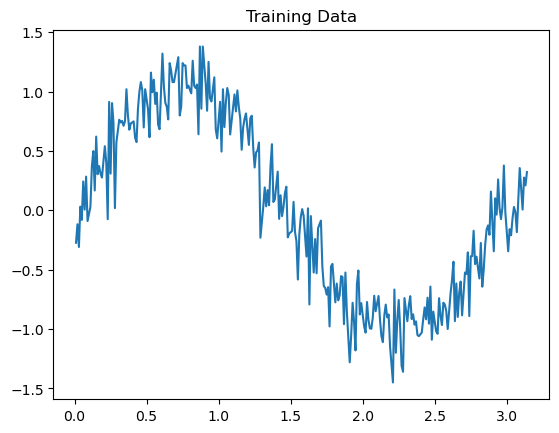

In [160]:

#Plot your Training Data using matplotlib
plt.plot(x_train, y_train)
#Displaying title on top of plot
plt.title("Training Data")
#showing plot
plt.show()

##### Expected Output


![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/O2.png?raw=true)


 ### Fit Linear Regression Model (Training data)

 As our linear Model was
 
![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion1.png?raw=true
)

And using derivatives we transformed our model into 2 simultaneous equations

![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20Model%20Eqs.png?raw=true)


Then converted it in matrix form

![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20Model.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [161]:

#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 
#calculating left most matrix
A = np.array([[x_train.shape[0], np.sum(x_train)], [np.sum(x_train), np.sum(np.square(x_train))]])
#calculating right most matrix
B = np.array([[np.sum(y_train)], [np.sum(np.dot(x_train,y_train))]])
#printing Matrix A
print("Matrix A:\n")
print(A)
#printing matrix B
print("\nMatrix B:\n")
print(B)

Matrix A:

[[283.     444.95  ]
 [444.95   932.7465]]

Matrix B:

[[   1.39087  ]
 [-126.6414295]]


Expected output

![Linear Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Linear.png?raw=true)


#### Compute Valus of Both Θ`s


In [162]:

#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node and 0_1

#Calculating A inverse and then multiplying it with B
X = np.dot(np.linalg.inv(A),B)
#printing X matrix
print("Matrix X for linear model: \n")
print(X)

Matrix X for linear model: 

[[ 0.8736061 ]
 [-0.55251074]]


Expected Output

![Linear Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20LinearT.png?raw=true)


### Run Predictions (Testing data)

In [163]:

# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x
# _____DO NOT USE FOR LOOP_____
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y

#reading csv file into testData
testData = pd.read_csv('testRegression.csv')

#TypeCast the data of column X into numpy array
test_x = np.array(testData['X'])

#TypeCast the data of column R into numpy array
test_y = np.array(testData['R'])

#Converting the column of test_x into numpy a 2 dimensional matrix
x = np.array(test_x).reshape(-1, 1)

#calculating the pridicted values of y
y = np.dot(x, X[1]) + X[0]

### Mean Square Error

![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion1.png?raw=true
)

In [164]:

#Using cost function calculate the cost of the model
#test_y is the Actual value
#y is the expected value
#Calculating the cost function
J = (1/(2*test_x.shape[0]))*np.sum(np.square(y - test_y))
#Printing Mean square Error
print("Mean Square Error for LINEAR MODEL is::",J)

Mean Square Error for LINEAR MODEL is:: 0.1579660860229887


Expected Output

![MSE of Linear](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Linear.png?raw=true
)

### Plot Data (Train and Test Data)

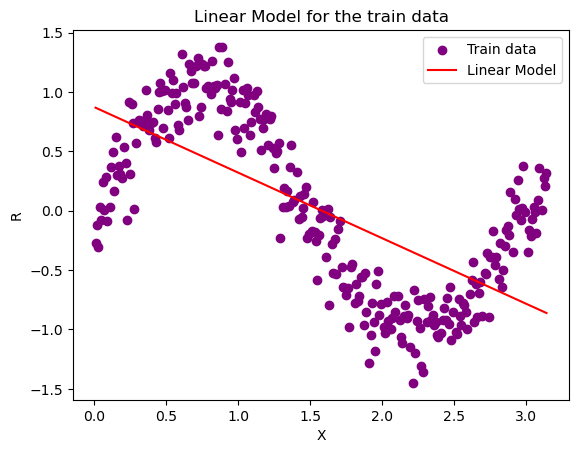

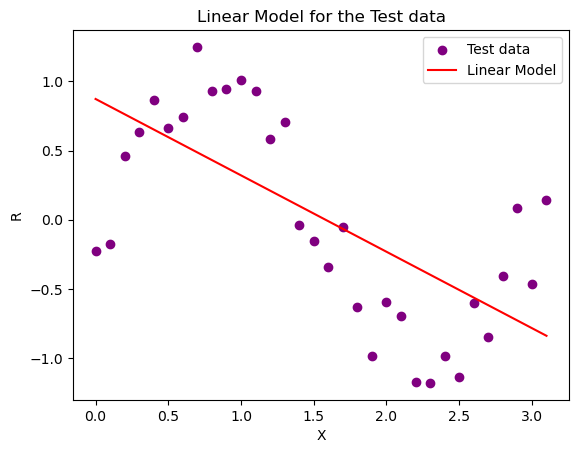

In [165]:

#Plot the predicted values of y against the test_x
# ploting Train data

#ploting train data and specifying the label argument
plt.scatter(x_train, y_train, color='purple', label='Train data')
linear_train = X[0]+X[1]*x_train
plt.plot(x_train, linear_train, color='red', label='Linear Model')

#Adding legend labels
plt.legend()
plt.xlabel('X')
plt.ylabel('R')
plt.title('Linear Model for the train data')
plt.show()

# ploting test data
plt.scatter(test_x, test_y, color='purple', label='Test data')
linear_test = X[0]+X[1]*test_x
plt.plot(test_x, linear_test, color='red', label='Linear Model')
plt.legend()
plt.xlabel('X')
plt.ylabel('R')
plt.title('Linear Model for the Test data')
plt.show()

### Expected Outputs for Linear Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20O%20test.png?raw=true)


## Now Fit The Quadratic Model

 As our Quadratic Model was
 
![Cost Funtion for quadratic ](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion2.png?raw=true
)

And using derivatives we transformed our model into 3 simultaneous equations

![Model Equations of quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20Model%20Eqs.png?raw=true)


Then converted it in matrix form

![Model Formula of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20Model1.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [166]:

#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 

#calculating left most matrix
A = np.array([[x_train.shape[0], np.sum(x_train), np.sum(np.square(x_train))], [np.sum(x_train), np.sum(np.square(x_train)), np.sum(np.power(x_train, 3))], [np.sum(np.square(x_train)), np.sum(np.power(x_train, 3)), np.sum(np.power(x_train, 4))]])
#calculating right most matrix
B = np.array([[np.sum(y_train)], [np.sum(np.dot(x_train,y_train))], [np.sum(np.dot(np.power(x_train, 2),y_train))]])
#printing Matrix A
print("Matrix A:\n")
print(A)
#printing matrix B
print("\nMatrix B:\n")
print(B)




Matrix A:

[[ 283.          444.95        932.7465    ]
 [ 444.95        932.7465     2199.781025  ]
 [ 932.7465     2199.781025   5533.85257677]]

Matrix B:

[[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]]


Expected Output

![Quadratic Model Matrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Quad1.png?raw=true)

#### Compute Valus Of Three Θ`s


In [167]:

#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node , 0_1 and 0_2

#Calculating A inverse and then multiplying it with B
X = np.dot(np.linalg.inv(A),B)
#printing X matrix
print("Matrix X for quadratic model: ")
print(X)

Matrix X for quadratic model: 
[[ 1.10611454]
 [-0.99606599]
 [ 0.14104585]]


Expected Output

![Quadratic Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Quad.png?raw=true)


### Run Predictions (Testing data)

In [168]:

# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x
# _____DO NOT USE FOR LOOP_____
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y

#reading csv file into testData
testData = pd.read_csv('testRegression.csv')

#TypeCast the data of column X into numpy array
test_x = np.array(testData['X'])

#TypeCast the data of column R into numpy array
test_y = np.array(testData['R'])

#Converting the column of test_x into numpy a 2 dimensional matrix
x = np.array(test_x).reshape(-1, 1)

#calculating the pridicted values of y
y = np.dot(x, X[1])+np.dot(np.square(x), X[2]) + X[0]

### Mean Square Error

![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion2.png?raw=true
)

In [169]:

#Using cost function calculate the cost of the model
#Calculating the cost function
J = (1/(2*test_x.shape[0]))*np.sum(np.square(y - test_y))
#Printing Mean square Error
print("Mean Square Error for LINEAR MODEL is::",J)

Mean Square Error for LINEAR MODEL is:: 0.16302089797481426


Expected Output

![MSE of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Quad.png?raw=true
)

### Plot Data (Train and Test Data)

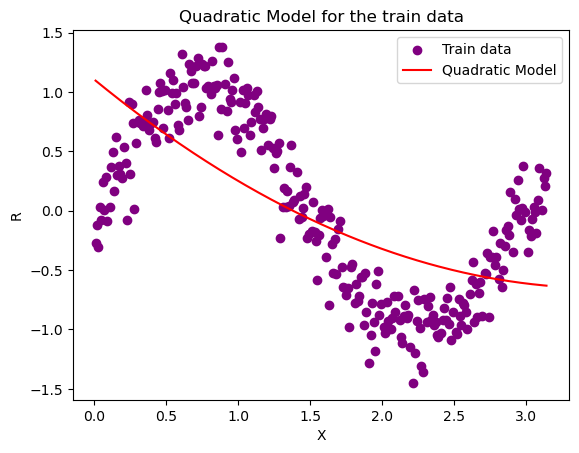

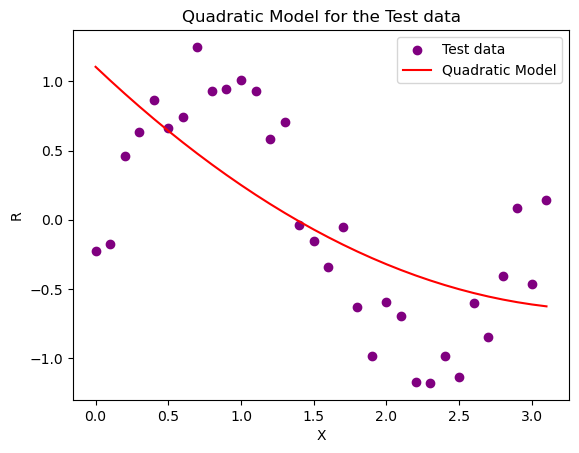

In [170]:

#Plot the predicted values of y against the test_x

#ploting train data and specifying the label argument
plt.scatter(x_train, y_train, color='purple', label='Train data')
linear_train = X[0]+X[1]*x_train+X[2]*np.square(x_train)
plt.plot(x_train, linear_train, color='red', label='Quadratic Model')

#Adding legend labels
plt.legend()
plt.xlabel('X')
plt.ylabel('R')
plt.title('Quadratic Model for the train data')
plt.show()

# ploting test data
plt.scatter(test_x, test_y, color='purple', label='Test data')
linear_test = X[0]+X[1]*test_x+X[2]*np.square(test_x)
plt.plot(test_x, linear_test, color='red', label='Quadratic Model')
plt.legend()
plt.xlabel('X')
plt.ylabel('R')
plt.title('Quadratic Model for the Test data')
plt.show()

### Expected Outputs for Quadratic Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20O%20tets.png?raw=true)


## Now Fit The Cubic Model

Cubic Model in matrix form

![Model Formula of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20Model.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [171]:

#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 

#calculating left most matrix
A = np.array([[x_train.shape[0], np.sum(x_train), np.sum(np.square(x_train)), np.sum(np.power(x_train, 3))], [np.sum(x_train), np.sum(np.square(x_train)), np.sum(np.power(x_train, 3)), np.sum(np.power(x_train, 4))], [np.sum(np.square(x_train)), np.sum(np.power(x_train, 3)), np.sum(np.power(x_train, 4)), np.sum(np.power(x_train,5))], [np.sum(np.power(x_train, 3)), np.sum(np.power(x_train, 4)), np.sum(np.power(x_train,5)), np.sum(np.power(x_train,6))]])
#calculating right most matrix
B = np.array([[np.sum(y_train)], [np.sum(np.dot(x_train,y_train))], [np.sum(np.dot(np.power(x_train, 2),y_train))], [np.sum(np.dot(np.power(x_train, 3),y_train))]])
#printing Matrix A
print("Matrix A:\n")
print(A)
#printing matrix B
print("\nMatrix B:\n")
print(B)


Matrix A:

[[  283.           444.95         932.7465      2199.781025  ]
 [  444.95         932.7465      2199.781025    5533.85257677]
 [  932.7465      2199.781025    5533.85257677 14501.33829628]
 [ 2199.781025    5533.85257677 14501.33829628 39086.48841058]]

Matrix B:

[[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]
 [-952.32410353]]


Expected Output

![Cubic Model Matrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Cubic1.png?raw=true)

#### Compute Valus Of Four Θ`s


In [172]:
#Your code Here
#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node , 0_1 ,0_2 and 0_3

#Calculating A inverse and then multiplying it with B
X = np.dot(np.linalg.inv(A),B)
#printing X matrix
print("Matrix X for quadratic model: \n")
print(X)

Matrix X for quadratic model: 

[[-0.18862637]
 [ 3.94071895]
 [-3.78251095]
 [ 0.83166145]]


Expected Output

![Cubic Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Cubic.png?raw=true)


### Run Predictions (Testing data)

In [173]:

# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y

#reading csv file into testData
testData = pd.read_csv('testRegression.csv')

#TypeCast the data of column X into numpy array
test_x = np.array(testData['X'])

#TypeCast the data of column R into numpy array
test_y = np.array(testData['R'])

#Converting the column of test_x into numpy a 2 dimensional matrix
x = np.array(test_x).reshape(-1, 1)

#calculating the pridicted values of y
y = np.dot(x, X[1])+np.dot(np.square(x), X[2])+ np.dot(np.power(x,3), X[3]) + X[0]

### Mean Square Error

In [174]:

#Using cost function calculate the cost of the model

#Calculating the cost function
J = (1/(2*test_x.shape[0]))*np.sum(np.square(y - test_y))
#Printing Mean square Error
print("Mean Square Error for LINEAR MODEL is::",J)

Mean Square Error for LINEAR MODEL is:: 0.025771028845477426


Expected Output

![MSE of Cubic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Cubic.png?raw=true
)

### Plot Data (Train and Test Data)

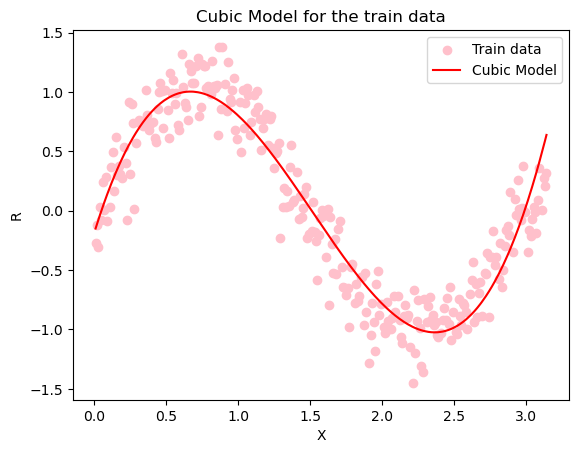

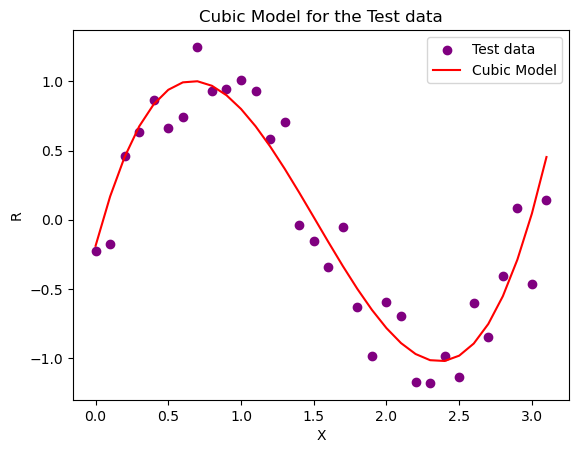

In [175]:

#Plot the predicted values of y against the test_x

#ploting train data and specifying the label argument
plt.scatter(x_train, y_train, color='pink', label='Train data')
linear_train = X[0]+X[1]*x_train+X[2]*np.square(x_train)+X[3]*np.power(x_train,3)
plt.plot(x_train, linear_train, color='red', label='Cubic Model')

#Adding legend labels
plt.legend()
plt.xlabel('X')
plt.ylabel('R')
plt.title('Cubic Model for the train data')
plt.show()

# ploting test data
plt.scatter(test_x, test_y, color='purple', label='Test data')
linear_test = X[0]+X[1]*test_x+X[2]*np.square(test_x)+X[3]*np.power(test_x,3)
plt.plot(test_x, linear_test, color='red', label='Cubic Model')
plt.legend()
plt.xlabel('X')
plt.ylabel('R')
plt.title('Cubic Model for the Test data')
plt.show()

### Expected Outputs for Cubic Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20O%20test.png?raw=true)


### Now You Are Required To Fit Your 4 , 5 and 6 degree Models Step By Step As You Did Before

## Now Fit The 4 degree Model

Matrix A:

[[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978103e+03
  5.53385258e+03]
 [4.44950000e+02 9.32746500e+02 2.19978103e+03 5.53385258e+03
  1.45013383e+04]
 [9.32746500e+02 2.19978103e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04]
 [2.19978103e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05]]

Matrix B:

[[ 1.39087000e+00]
 [-1.26641430e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]]
Matrix X for quadratic model: 

[[-0.40789474]
 [ 5.3320982 ]
 [-5.77179206]
 [ 1.81519401]
 [-0.15632916]]
Mean Square Error for LINEAR MODEL is:: 0.025012609208221678


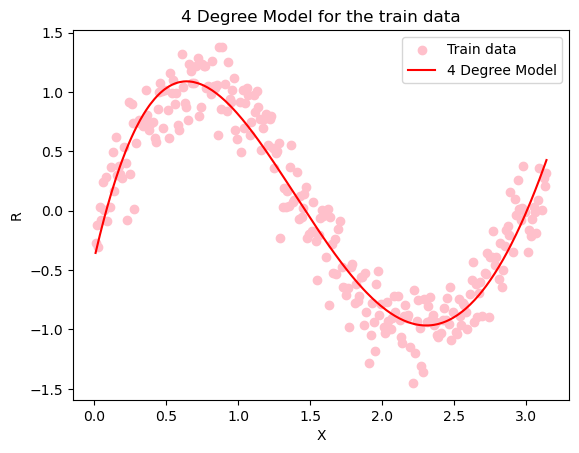

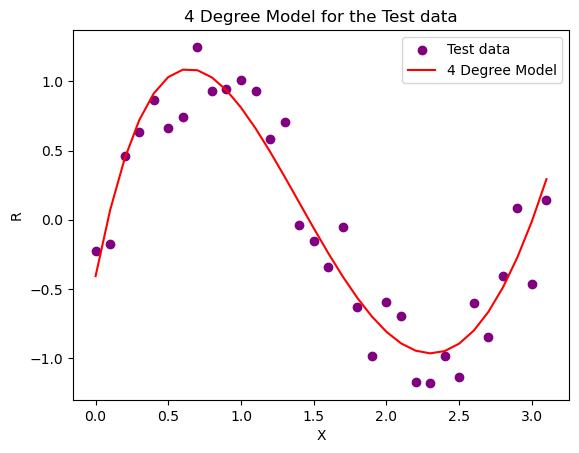

In [176]:


# calculating left most matrix
A = np.array([[x_train.shape[0], np.sum(x_train), np.sum(np.square(x_train)), np.sum(np.power(x_train, 3)),
               np.sum(np.power(x_train, 4))],
              [np.sum(x_train), np.sum(np.square(x_train)), np.sum(np.power(x_train, 3)), np.sum(np.power(x_train, 4)),
               np.sum(np.power(x_train, 5))],
              [np.sum(np.square(x_train)), np.sum(np.power(x_train, 3)), np.sum(np.power(x_train, 4)),
               np.sum(np.power(x_train, 5)), np.sum(np.power(x_train, 6))],
              [np.sum(np.power(x_train, 3)), np.sum(np.power(x_train, 4)), np.sum(np.power(x_train, 5)),
               np.sum(np.power(x_train, 6)), np.sum(np.power(x_train, 7))],
              [np.sum(np.power(x_train, 4)), np.sum(np.power(x_train, 5)), np.sum(np.power(x_train, 6)),
               np.sum(np.power(x_train, 7)), np.sum(np.power(x_train, 8))]])
# calculating right most matrix
B = np.array([[np.sum(y_train)], [np.sum(np.dot(x_train, y_train))], [np.sum(np.dot(np.power(x_train, 2), y_train))],
              [np.sum(np.dot(np.power(x_train, 3), y_train))], [np.sum(np.dot(np.power(x_train, 4), y_train))]])
# printing Matrix A
print("Matrix A:\n")
print(A)
# printing matrix B
print("\nMatrix B:\n")
print(B)

# Calculating A inverse and then multiplying it with B
X = np.dot(np.linalg.inv(A), B)
# printing X matrix
print("Matrix X for quadratic model: \n")
print(X)

# reading csv file into testData
testData = pd.read_csv('testRegression.csv')

# TypeCast the data of column X into numpy array
test_x = np.array(testData['X'])

# TypeCast the data of column R into numpy array
test_y = np.array(testData['R'])

# Converting the column of test_x into numpy a 2 dimensional matrix
x = np.array(test_x).reshape(-1, 1)

# calculating the pridicted values of y
y = np.dot(x, X[1]) + np.dot(np.square(x), X[2]) + np.dot(np.power(x, 3), X[3]) + np.dot(np.power(x, 4), X[4]) + X[0]

# Calculating the cost function
J = (1 / (2 * test_x.shape[0])) * np.sum(np.square(y - test_y))
# Printing Mean square Error
print("Mean Square Error for LINEAR MODEL is::", J)

# ploting train data and specifying the label argument
plt.scatter(x_train, y_train, color='pink', label='Train data')
linear_train = X[0] + X[1] * x_train + X[2] * np.square(x_train) + X[3] * np.power(x_train, 3) + X[4] * np.power(x_train, 4)
plt.plot(x_train, linear_train, color='red', label='4 Degree Model')

# Adding legend labels
plt.legend()
plt.xlabel('X')
plt.ylabel('R')
plt.title('4 Degree Model for the train data')
plt.show()

# ploting test data
plt.scatter(test_x, test_y, color='purple', label='Test data')
linear_test = X[0] + X[1] * test_x + X[2] * np.square(test_x) + X[3] * np.power(test_x, 3) + X[4] * np.power(test_x, 4)
plt.plot(test_x, linear_test, color='red', label='4 Degree Model')
plt.legend()
plt.xlabel('X')
plt.ylabel('R')
plt.title('4 Degree Model for the Test data')
plt.show()


## Now Fit The 5 degree Model

Matrix A:

[[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978103e+03
  5.53385258e+03 1.45013383e+04]
 [4.44950000e+02 9.32746500e+02 2.19978103e+03 5.53385258e+03
  1.45013383e+04 3.90864884e+04]
 [9.32746500e+02 2.19978103e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04 1.07548336e+05]
 [2.19978103e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05 3.00624107e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05 8.50829605e+05]
 [1.45013383e+04 3.90864884e+04 1.07548336e+05 3.00624107e+05
  8.50829605e+05 2.43237118e+06]]

Matrix B:

[[ 1.39087000e+00]
 [-1.26641430e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]
 [-5.57500637e+03]]
Matrix X for quadratic model: 

[[-0.15135453]
 [ 2.89713972]
 [-0.36242335]
 [-2.76674175]
 [ 1.48161173]
 [-0.20822932]]
Mean Square Error for LINEAR MODEL is:: 0.02210338713478375


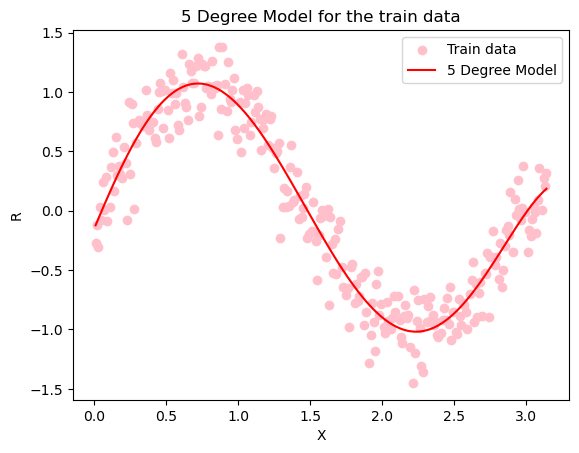

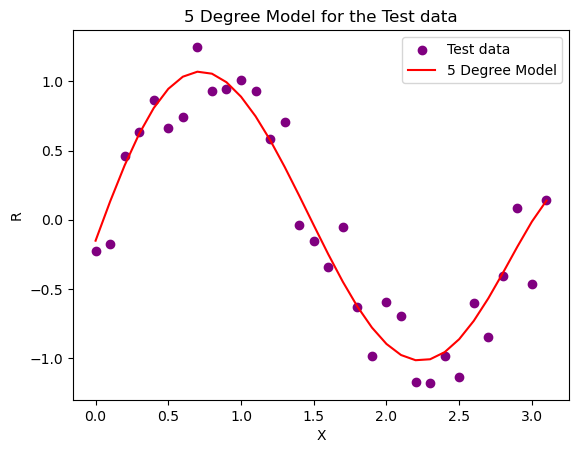

In [177]:


# calculating left most matrix
A = np.array([[x_train.shape[0], np.sum(x_train), np.sum(np.square(x_train)), np.sum(np.power(x_train, 3)),
               np.sum(np.power(x_train, 4)), np.sum(np.power(x_train, 5))],
              [np.sum(x_train), np.sum(np.square(x_train)), np.sum(np.power(x_train, 3)), np.sum(np.power(x_train, 4)),
               np.sum(np.power(x_train, 5)), np.sum(np.power(x_train, 6))],
              [np.sum(np.square(x_train)), np.sum(np.power(x_train, 3)), np.sum(np.power(x_train, 4)),
               np.sum(np.power(x_train, 5)), np.sum(np.power(x_train, 6)), np.sum(np.power(x_train, 7))],
              [np.sum(np.power(x_train, 3)), np.sum(np.power(x_train, 4)), np.sum(np.power(x_train, 5)),
               np.sum(np.power(x_train, 6)), np.sum(np.power(x_train, 7)), np.sum(np.power(x_train, 8))],
              [np.sum(np.power(x_train, 4)), np.sum(np.power(x_train, 5)), np.sum(np.power(x_train, 6)),
               np.sum(np.power(x_train, 7)), np.sum(np.power(x_train, 8)), np.sum(np.power(x_train, 9))],
              [np.sum(np.power(x_train, 5)), np.sum(np.power(x_train, 6)), np.sum(np.power(x_train, 7)),
               np.sum(np.power(x_train, 8)), np.sum(np.power(x_train, 9)), np.sum(np.power(x_train, 10))]
              ])
# calculating right most matrix
B = np.array([[np.sum(y_train)], [np.sum(np.dot(x_train, y_train))], [np.sum(np.dot(np.power(x_train, 2), y_train))],
              [np.sum(np.dot(np.power(x_train, 3), y_train))], [np.sum(np.dot(np.power(x_train, 4), y_train))], [np.sum(np.dot(np.power(x_train, 5), y_train))]])
# printing Matrix A
print("Matrix A:\n")
print(A)
# printing matrix B
print("\nMatrix B:\n")
print(B)

# Calculating A inverse and then multiplying it with B
X = np.dot(np.linalg.inv(A), B)
# printing X matrix
print("Matrix X for quadratic model: \n")
print(X)

# reading csv file into testData
testData = pd.read_csv('testRegression.csv')

# TypeCast the data of column X into numpy array
test_x = np.array(testData['X'])

# TypeCast the data of column R into numpy array
test_y = np.array(testData['R'])

# Converting the column of test_x into numpy a 2 dimensional matrix
x = np.array(test_x).reshape(-1, 1)

# calculating the pridicted values of y
y = np.dot(x, X[1]) + np.dot(np.square(x), X[2]) + np.dot(np.power(x, 3), X[3]) + np.dot(np.power(x, 4), X[4]) + np.dot(np.power(x, 5), X[5]) + X[0]

# Calculating the cost function
J = (1 / (2 * test_x.shape[0])) * np.sum(np.square(y - test_y))
# Printing Mean square Error
print("Mean Square Error for LINEAR MODEL is::", J)

# ploting train data and specifying the label argument
plt.scatter(x_train, y_train, color='pink', label='Train data')
linear_train = X[0] + X[1] * x_train + X[2] * np.square(x_train) + X[3] * np.power(x_train, 3) + X[4] * np.power(x_train, 4) + X[5] * np.power(x_train, 5)
plt.plot(x_train, linear_train, color='red', label='5 Degree Model')

# Adding legend labels
plt.legend()
plt.xlabel('X')
plt.ylabel('R')
plt.title('5 Degree Model for the train data')
plt.show()

# ploting test data
plt.scatter(test_x, test_y, color='purple', label='Test data')
linear_test = X[0] + X[1] * test_x + X[2] * np.square(test_x) + X[3] * np.power(test_x, 3) + X[4] * np.power(test_x, 4)+ X[5] * np.power(test_x, 5)
plt.plot(test_x, linear_test, color='red', label='5 Degree Model')
plt.legend()
plt.xlabel('X')
plt.ylabel('R')
plt.title('5 Degree Model for the Test data')
plt.show()

## Now Fit The 6 degree Model

Matrix A:

[[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978103e+03
  5.53385258e+03 1.45013383e+04 3.90864884e+04]
 [4.44950000e+02 9.32746500e+02 2.19978103e+03 5.53385258e+03
  1.45013383e+04 3.90864884e+04 1.07548336e+05]
 [9.32746500e+02 2.19978103e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04 1.07548336e+05 3.00624107e+05]
 [2.19978103e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05 3.00624107e+05 8.50829605e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05 8.50829605e+05 2.43237118e+06]
 [1.45013383e+04 3.90864884e+04 1.07548336e+05 3.00624107e+05
  8.50829605e+05 2.43237118e+06 7.01172536e+06]
 [3.90864884e+04 1.07548336e+05 3.00624107e+05 8.50829605e+05
  2.43237118e+06 7.01172536e+06 2.03540142e+07]]

Matrix B:

[[ 1.39087000e+00]
 [-1.26641430e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]
 [-5.57500637e+03]
 [-1.35290159e+04]]
Matrix X for quadratic model: 

[[-0.12883598]
 [ 2.59932802]
 [ 0.58098

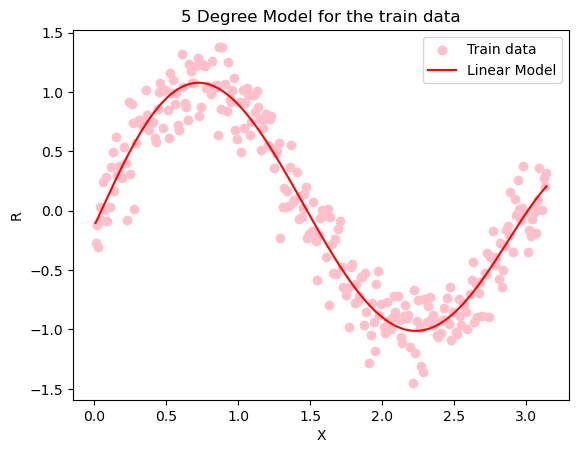

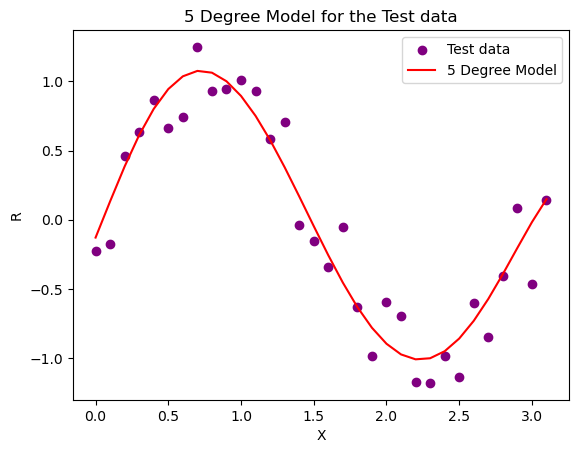

In [178]:


# calculating left most matrix
A = np.array([[x_train.shape[0], np.sum(x_train), np.sum(np.square(x_train)), np.sum(np.power(x_train, 3)),
               np.sum(np.power(x_train, 4)), np.sum(np.power(x_train, 5)), np.sum(np.power(x_train, 6))],
              [np.sum(x_train), np.sum(np.square(x_train)), np.sum(np.power(x_train, 3)), np.sum(np.power(x_train, 4)),
               np.sum(np.power(x_train, 5)), np.sum(np.power(x_train, 6)), np.sum(np.power(x_train, 7))],
              [np.sum(np.square(x_train)), np.sum(np.power(x_train, 3)), np.sum(np.power(x_train, 4)),
               np.sum(np.power(x_train, 5)), np.sum(np.power(x_train, 6)), np.sum(np.power(x_train, 7)), np.sum(np.power(x_train, 8))],
              [np.sum(np.power(x_train, 3)), np.sum(np.power(x_train, 4)), np.sum(np.power(x_train, 5)),
               np.sum(np.power(x_train, 6)), np.sum(np.power(x_train, 7)), np.sum(np.power(x_train, 8)), np.sum(np.power(x_train, 9))],
              [np.sum(np.power(x_train, 4)), np.sum(np.power(x_train, 5)), np.sum(np.power(x_train, 6)),
               np.sum(np.power(x_train, 7)), np.sum(np.power(x_train, 8)), np.sum(np.power(x_train, 9)), np.sum(np.power(x_train, 10))],
              [np.sum(np.power(x_train, 5)), np.sum(np.power(x_train, 6)), np.sum(np.power(x_train, 7)),
               np.sum(np.power(x_train, 8)), np.sum(np.power(x_train, 9)), np.sum(np.power(x_train, 10)), np.sum(np.power(x_train, 11))],
              [np.sum(np.power(x_train, 6)), np.sum(np.power(x_train, 7)), np.sum(np.power(x_train, 8)),
               np.sum(np.power(x_train, 9)), np.sum(np.power(x_train, 10)), np.sum(np.power(x_train, 11)), np.sum(np.power(x_train, 12))]])
# calculating right most matrix
B = np.array([[np.sum(y_train)], [np.sum(np.dot(x_train, y_train))], [np.sum(np.dot(np.power(x_train, 2), y_train))],
              [np.sum(np.dot(np.power(x_train, 3), y_train))], [np.sum(np.dot(np.power(x_train, 4), y_train))], 
              [np.sum(np.dot(np.power(x_train, 5), y_train))], [np.sum(np.dot(np.power(x_train, 6), y_train))]])
# printing Matrix A
print("Matrix A:\n")
print(A)
# printing matrix B
print("\nMatrix B:\n")
print(B)

# Calculating A inverse and then multiplying it with B
X = np.dot(np.linalg.inv(A), B)
# printing X matrix
print("Matrix X for quadratic model: \n")
print(X)

# reading csv file into testData
testData = pd.read_csv('testRegression.csv')

# TypeCast the data of column X into numpy array
test_x = np.array(testData['X'])

# TypeCast the data of column R into numpy array
test_y = np.array(testData['R'])

# Converting the column of test_x into numpy a 2 dimensional matrix
x = np.array(test_x).reshape(-1, 1)

# calculating the pridicted values of y
y = np.dot(x, X[1]) + np.dot(np.square(x), X[2]) + np.dot(np.power(x, 3), X[3]) + np.dot(np.power(x, 4), X[4]) \
    + np.dot(np.power(x, 5), X[5]) + np.dot(np.power(x, 6), X[6]) + X[0]

# Calculating the cost function
J = (1 / (2 * test_x.shape[0])) * np.sum(np.square(y - test_y))
# Printing Mean square Error
print("Mean Square Error for LINEAR MODEL is::", J)

# ploting train data and specifying the label argument
plt.scatter(x_train, y_train, color='pink', label='Train data')
linear_train = X[0] + X[1] * x_train + X[2] * np.square(x_train) + X[3] * np.power(x_train, 3) + X[4] * np.power(x_train, 4) + X[5] * np.power(x_train, 5) + X[6] * np.power(x_train, 6)
plt.plot(x_train, linear_train, color='red', label='Linear Model')

# Adding legend labels
plt.legend()
plt.xlabel('X')
plt.ylabel('R')
plt.title('5 Degree Model for the train data')
plt.show()

# ploting test data
plt.scatter(test_x, test_y, color='purple', label='Test data')
linear_test = X[0] + X[1] * test_x + X[2] * np.square(test_x) + X[3] * np.power(test_x, 3) + X[4] * np.power(test_x, 4) + X[5] * np.power(test_x, 5) + X[6] * np.power(test_x, 6)
plt.plot(test_x, linear_test, color='red', label='5 Degree Model')
plt.legend()
plt.xlabel('X')
plt.ylabel('R')
plt.title('5 Degree Model for the Test data')
plt.show()